## Algoritmo de Maximización de la Esperanza
#### Estudiantes: Dennis Luna Acuña- Graciela Rivera Picado - Luis Vargas Porras

### 1. Libraries

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import scipy
from scipy.stats import entropy
from scipy.stats import norm
from torch.distributions import normal
from torch.distributions import multivariate_normal
from scipy import stats 
import seaborn as sns 

### 2. Generate data with Gaussian distribution

*The data are artificially created with a 2-cluster Gaussian distribution with specific means and variances.*

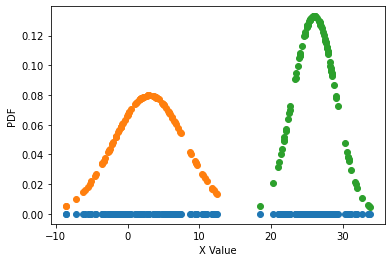

tensor([ 2.9696e+00,  3.6617e+00,  1.0736e+01, -3.3588e+00, -3.5316e+00,
         1.0455e+01,  4.3324e+00, -6.4178e-03,  1.7307e+00,  7.3108e+00,
         9.5351e+00,  1.2450e+01,  3.7801e+00, -6.5039e-01, -6.2137e+00,
         5.8228e+00, -2.6195e+00, -1.6473e+00, -1.6767e+00, -2.7091e+00,
         1.5477e+00, -9.5393e-01,  3.8429e+00,  2.0117e+00,  3.9749e+00,
        -8.6238e+00,  5.8992e+00,  1.1997e+01,  2.2221e+00, -1.5596e+00,
         2.8640e+00, -9.1560e-01,  5.6341e+00, -5.9845e+00,  6.7236e+00,
         2.3948e-01,  2.7113e+00,  9.4943e+00,  1.3613e+00, -2.1375e+00,
         1.0398e+01, -1.2871e+00,  3.9117e+00,  2.1774e+00,  6.2153e+00,
         1.0472e+00,  9.6344e+00,  1.1766e+01, -3.1160e+00,  1.1551e+00,
        -2.0335e+00, -9.7683e-01,  1.7355e+00,  1.9326e+00,  4.1296e+00,
        -8.5708e+00, -3.9086e-01,  8.6876e+00,  5.7155e-02,  2.7758e+00,
        -1.1905e+00, -3.5801e+00,  4.9904e+00,  5.4162e+00,  9.3481e+00,
         4.0263e+00, -3.3287e+00, -2.5843e+00, -5.0

In [21]:
def generate_data(numberSamplesPerClass, mean1, mean2 , stds1 , stds2 ):
    """
    Creates the data to be used for training, using a GMM distribution
    @param numberSamplesPerClass, the number of samples per class
    @param mean1, means for samples from the class 1
    @param mean2, means for samples from the class 2
    @param stds1, standard deviation for samples, class 1
    @param stds2, standard deviation for samples, class 2    """

    samplesClass1 = createDataOneClass(mean1, stds1, numberSamplesPerClass)
    samplesClass2 = createDataOneClass(mean2, stds2, numberSamplesPerClass)
    #Concatenates
    samplesAll = torch.cat((samplesClass1, samplesClass2), 0)
    # Plot Data
    y = np.zeros_like(samplesAll)
    plt.scatter(samplesAll,y)
    #plt.title('Plotting)
    plt.xlabel('X Value')
    plt.ylabel('PDF')

    #Plot densities Functions
    plt.scatter(samplesClass1, norm.pdf(samplesClass1, mean1, stds1))
    plt.scatter(samplesClass2, norm.pdf(samplesClass2, mean2, stds2))      
    
    plt.show()
    
    return (samplesAll)

'''
Creates data with gaussian distribution
'''
def createDataOneClass(means, std, numberSamplesPerClass):
    normal_dist = torch.distributions.Normal(means,std)
    gaussian_sample = normal_dist.sample((numberSamplesPerClass,1)).squeeze()
    
    return gaussian_sample

#Prueba
generate_data(numberSamplesPerClass=100, mean1=3.0, mean2=26.0, stds1=5.0, stds2=3.0)

#Hacer grafico donde x sean los datos y y las densidades(En proceso).

titulo:## 3. Create init_random_parameters

In [ ]:
def init_random_parameters(K=2, range_mean = [1,10], range_std = [1,5]):
    
    np.random.seed(2)    
    
    mean = torch.randint(range_mean[0],range_mean[1],(K,1))
    std  = torch.randint(range_std[0], range_std[1],(K,1))  
    
    W = torch.cat((mean, std), 1)
    
    return W

#test

init_random_parameters(K=2, range_mean = [1,100], range_std = [1,10])